In [65]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


pd.options.display.float_format = '{:20.2f}'.format
pd.set_option('display.max_columns', 999)

In [109]:
df = pd.read_csv('data.csv')

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ORD_001048,CUST_01048,2024-03-26,18,Female,Izmir,Beauty,130.35,1,27.30,103.05,Bank Transfer,Mobile,17,10,False,9,1
4996,ORD_001051,CUST_01051,2024-03-26,27,Male,Adana,Beauty,71.55,1,0.00,71.55,Debit Card,Mobile,13,9,True,6,4
4997,ORD_003543,CUST_03543,2024-03-26,45,Female,Antalya,Food,39.38,1,5.27,34.11,Digital Wallet,Mobile,38,10,True,5,4
4998,ORD_004443,CUST_04443,2024-03-26,41,Female,Istanbul,Fashion,171.19,1,0.00,171.19,Credit Card,Mobile,20,12,True,5,4


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  5000 non-null   object 
 1   Customer_ID               5000 non-null   object 
 2   Date                      5000 non-null   object 
 3   Age                       5000 non-null   int64  
 4   Gender                    5000 non-null   object 
 5   City                      5000 non-null   object 
 6   Product_Category          5000 non-null   object 
 7   Unit_Price                5000 non-null   float64
 8   Quantity                  5000 non-null   int64  
 9   Discount_Amount           5000 non-null   float64
 10  Total_Amount              5000 non-null   float64
 11  Payment_Method            5000 non-null   object 
 12  Device_Type               5000 non-null   object 
 13  Session_Duration_Minutes  5000 non-null   int64  
 14  Pages_Vi

In [68]:
df.describe()

,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,35.03,455.83,2.22,24.85,983.11,14.57,8.98,6.50,3.90
std,11.08,712.48,1.40,88.39,1898.98,8.67,2.80,3.46,1.13
min,18.00,5.18,1.00,0.00,7.87,1.00,1.00,1.00,1.00
25%,27.00,76.59,1.00,0.00,122.52,8.00,7.00,4.00,3.00
50%,35.00,182.95,2.00,0.00,337.91,13.00,9.00,6.00,4.00
75%,42.00,513.93,3.00,8.76,979.69,19.00,11.00,8.00,5.00
max,75.00,7159.45,5.00,1525.55,22023.90,73.00,24.00,25.00,5.00


In [69]:
cleaned_df = df.copy()
cleaned_df["Date"] = pd.to_datetime(cleaned_df["Date"])

In [71]:
df[df["Customer_ID"].duplicated(keep=False)].sort_values("Customer_ID")
# See if there are any duplicates at all
#df["Customer_ID"].duplicated().any()


,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating


In [72]:
max_date = cleaned_df["Date"].max()+ pd.Timedelta(days=1)
cleaned_df["Recency"] = (max_date - cleaned_df["Date"]).dt.days

In [73]:
cleaned_df

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating,Recency
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5,451
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3,451
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2,451
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4,451
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4,451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ORD_001048,CUST_01048,2024-03-26,18,Female,Izmir,Beauty,130.35,1,27.30,103.05,Bank Transfer,Mobile,17,10,False,9,1,1
4996,ORD_001051,CUST_01051,2024-03-26,27,Male,Adana,Beauty,71.55,1,0.00,71.55,Debit Card,Mobile,13,9,True,6,4,1
4997,ORD_003543,CUST_03543,2024-03-26,45,Female,Antalya,Food,39.38,1,5.27,34.11,Digital Wallet,Mobile,38,10,True,5,4,1
4998,ORD_004443,CUST_04443,2024-03-26,41,Female,Istanbul,Fashion,171.19,1,0.00,171.19,Credit Card,Mobile,20,12,True,5,4,1


<Axes: xlabel='Date', ylabel='Total_Amount'>

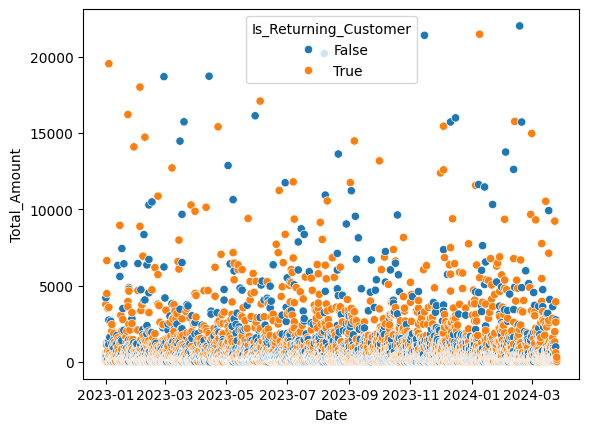

In [74]:
sns.scatterplot(data=cleaned_df, x="Date", y="Total_Amount", hue="Is_Returning_Customer")

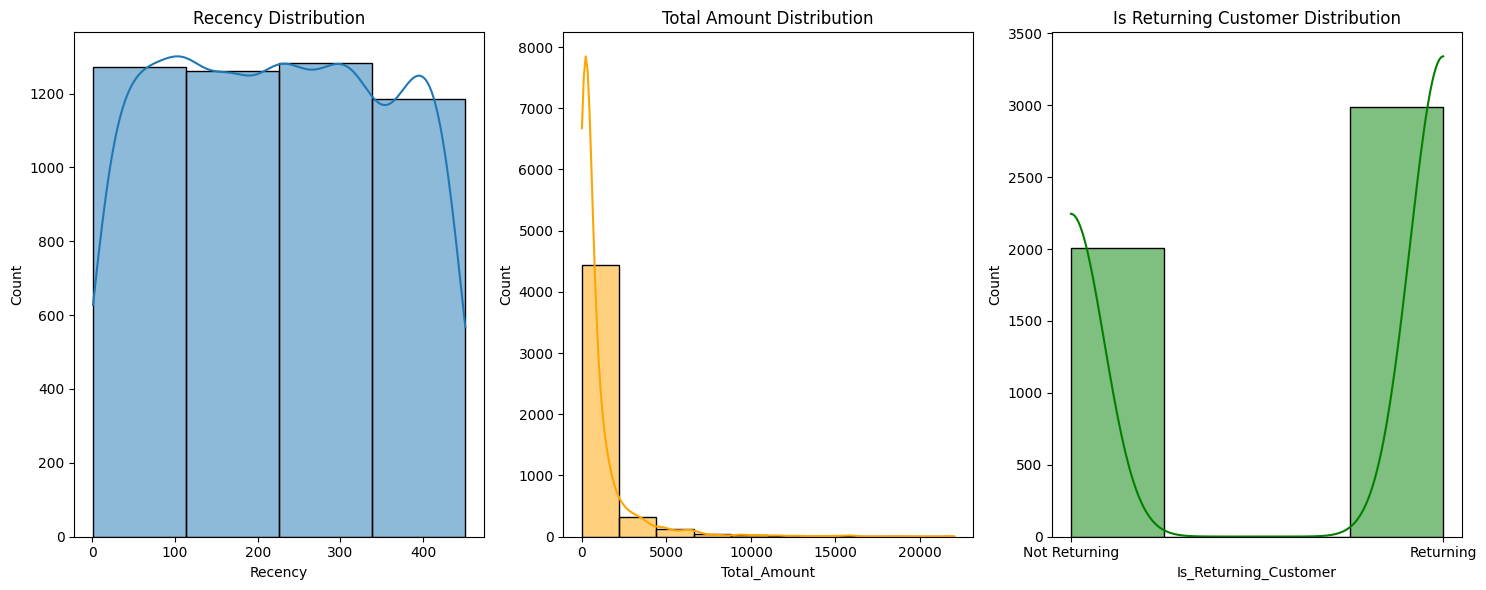

In [75]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.histplot(cleaned_df["Recency"], bins=4, kde=True)  
plt.title('Recency Distribution')   

plt.subplot(1,3,2)
sns.histplot(cleaned_df["Total_Amount"], bins=10, kde=True, color='orange')
plt.title('Total Amount Distribution')

plt.subplot(1,3,3)
sns.histplot(cleaned_df["Is_Returning_Customer"], bins=4, kde=True, color='green')
plt.title('Is Returning Customer Distribution')
plt.xticks([0, 1], ['Not Returning', 'Returning'])  # Set x-axis ticks

plt.tight_layout()
plt.show()

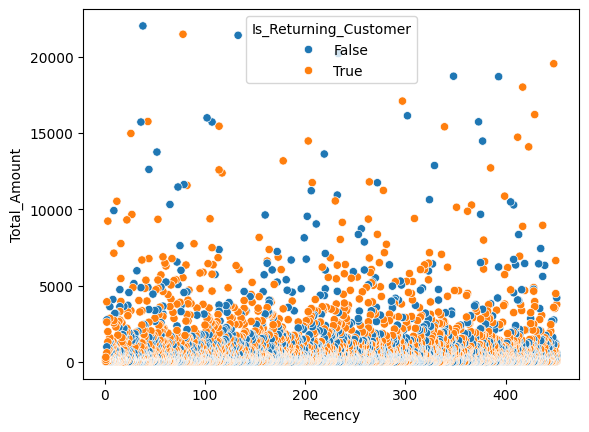

In [76]:
sns.scatterplot(data=cleaned_df, x="Recency", y="Total_Amount", hue="Is_Returning_Customer")
plt.show()

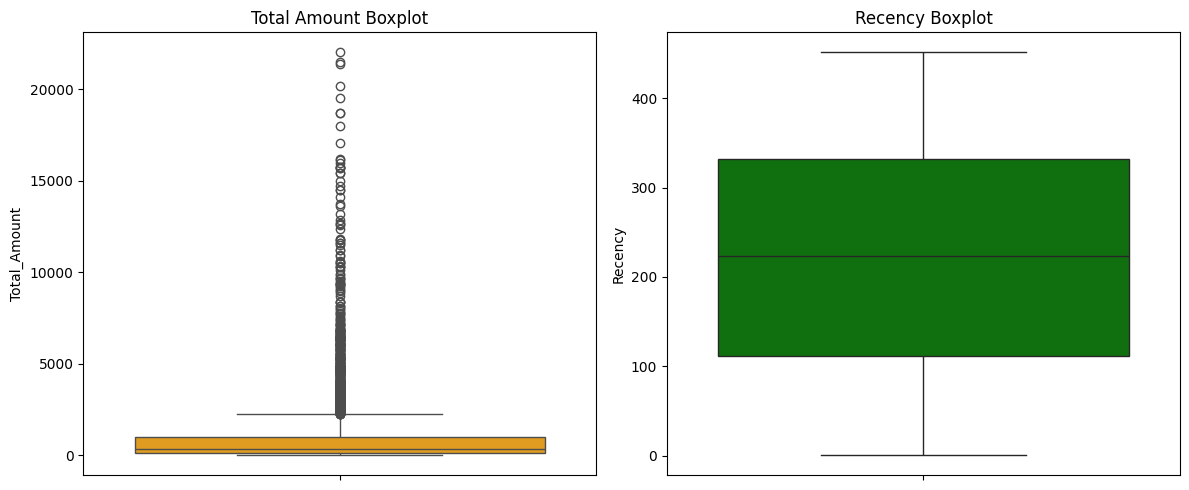

In [77]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(data=cleaned_df['Total_Amount'], color='orange')
plt.title('Total Amount Boxplot')

plt.subplot(1,2,2)
sns.boxplot(data=cleaned_df['Recency'], color='green')
plt.title('Recency Boxplot')

plt.tight_layout()
plt.show()

In [84]:
total_amount_q1 = cleaned_df['Total_Amount'].quantile(0.25)
total_amount_q3 = cleaned_df['Total_Amount'].quantile(0.75)
total_amount_iqr = total_amount_q3 - total_amount_q1

total_amount_outliers = cleaned_df[(cleaned_df['Total_Amount'] < (total_amount_q1 - 1.5 * total_amount_iqr)) | (cleaned_df['Total_Amount'] > (total_amount_q3 + 1.5 * total_amount_iqr))]
non_total_amount_outliers = cleaned_df[~cleaned_df.index.isin(total_amount_outliers.index)]

total_amount_outliers[['Total_Amount']].describe()

,Total_Amount
count,546.00
mean,5106.25
std,3446.82
min,2265.64
25%,2898.59
50%,3810.93
75%,6025.60
max,22023.90


Text(0.5, 1.0, 'Total Amount Boxplot without Outliers')

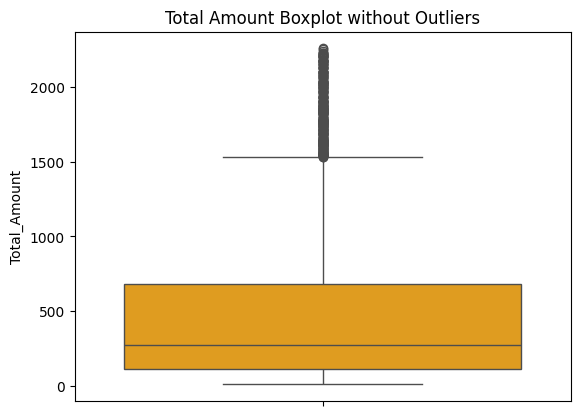

In [79]:
sns.boxplot(data=non_total_amount_outliers['Total_Amount'], color='orange')
plt.title('Total Amount Boxplot without Outliers')

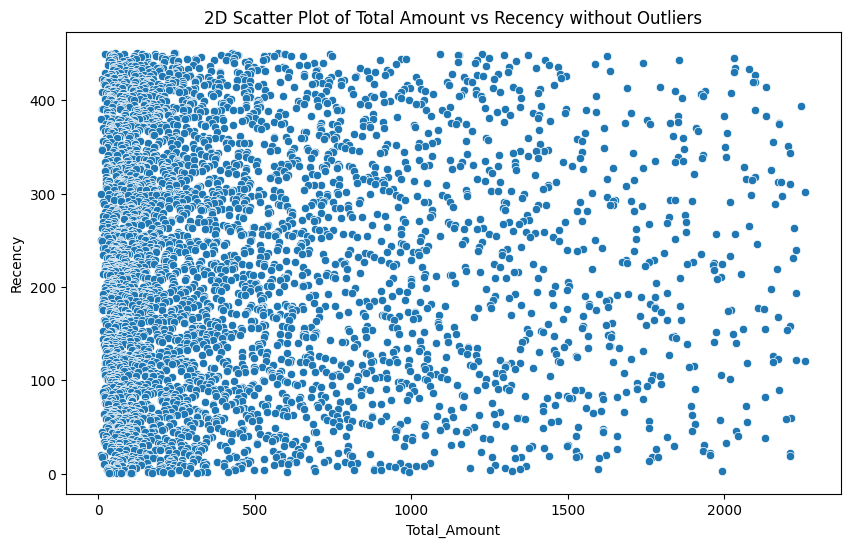

In [80]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=non_total_amount_outliers, x="Total_Amount", y="Recency")

plt.title('2D Scatter Plot of Total Amount vs Recency without Outliers')

plt.show()


In [81]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_total_amount_outliers[['Recency', 'Total_Amount']]) 

scaled_data

array([[ 1.75319853, -0.83980554],
       [ 1.75319853, -0.46170393],
       [ 1.75319853, -0.46993561],
       ...,
       [-1.73113093, -0.87981346],
       [-1.73113093, -0.60791036],
       [-1.73113093, -0.32170597]])

In [90]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_total_amount_outliers.index, columns=['Recency', 'Total_Amount'])

scaled_data_df

,Recency,Total_Amount
0,1.75,-0.84
1,1.75,-0.46
2,1.75,-0.47
3,1.75,0.19
5,1.75,-0.70
...,...,...
4995,-1.73,-0.74
4996,-1.73,-0.81
4997,-1.73,-0.88
4998,-1.73,-0.61


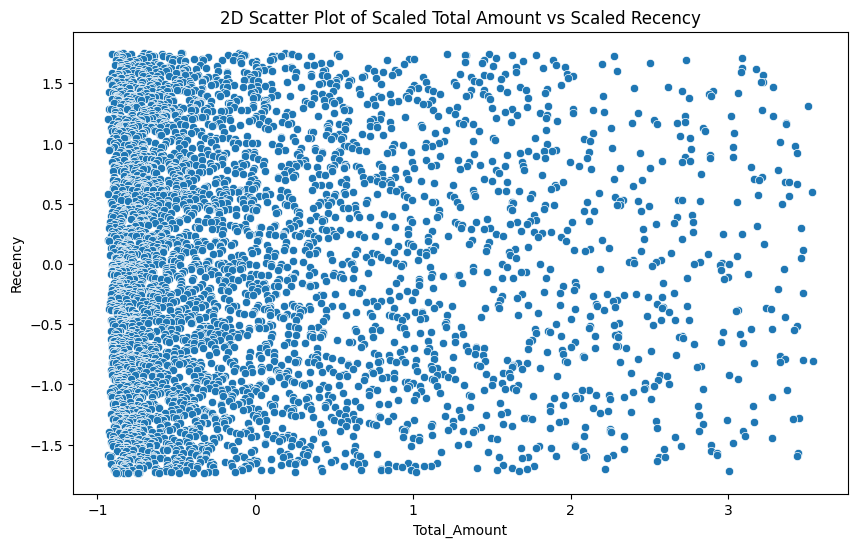

In [92]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=scaled_data_df, x="Total_Amount", y="Recency")

plt.title('2D Scatter Plot of Scaled Total Amount vs Scaled Recency')

plt.show()

# K-Means Clustering für Datenpunkte ohne Ausreißer*

*Ausreißer Punkte stellen hierbei die Top Kunden dar, werden aber weiter unten gesondert segmentiert.

## Elbow Method

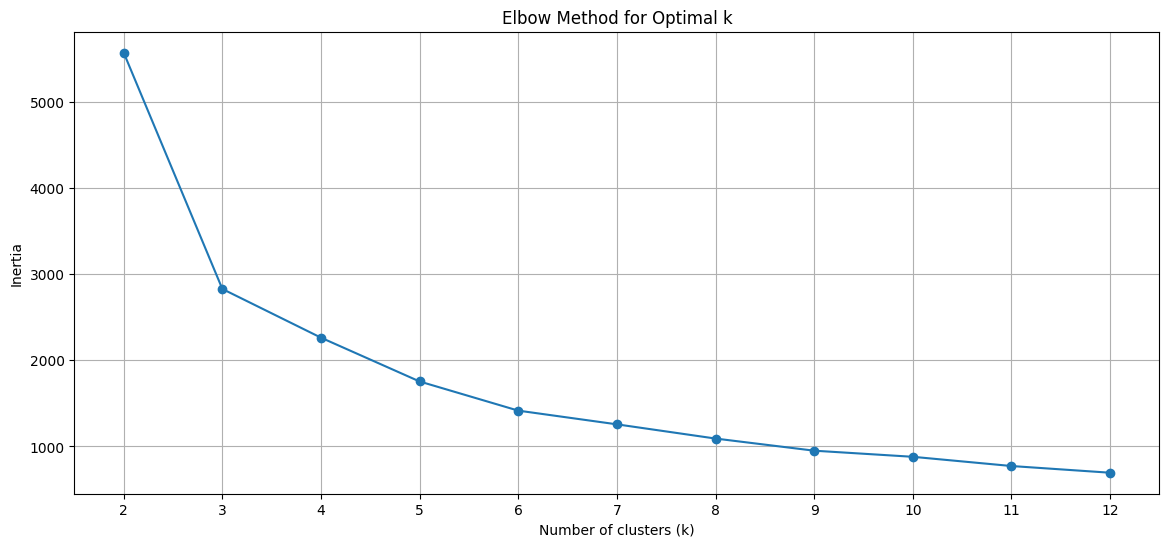

In [95]:
max_k = 12

intertia = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    kmeans.fit_predict(scaled_data_df)
    intertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.plot(k_values, intertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.show()

## Silhouette Score

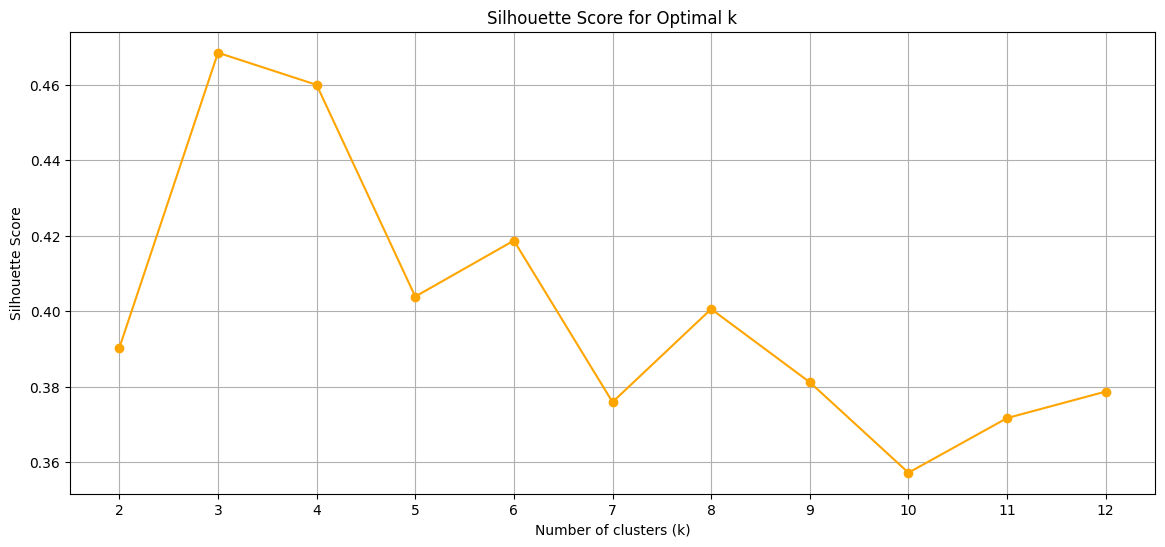

In [98]:
max_k = 12

intertia = []
silhouette_scores = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)
    intertia.append(kmeans.inertia_)


plt.figure(figsize=(14, 6))

plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.show()

In [99]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [100]:
non_total_amount_outliers['Cluster'] = cluster_labels

non_total_amount_outliers

/var/folders/tt/17l24mc97qn4rv53m2c8v5wm0000gn/T/ipykernel_88352/3986091614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_total_amount_outliers['Cluster'] = cluster_labels


,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating,Recency,Cluster
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5,451,0
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3,451,0
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2,451,0
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4,451,0
5,ORD_000223,CUST_00223,2023-01-01,43,Female,Istanbul,Beauty,122.46,1,0.00,122.46,Credit Card,Mobile,14,9,True,9,5,451,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ORD_001048,CUST_01048,2024-03-26,18,Female,Izmir,Beauty,130.35,1,27.30,103.05,Bank Transfer,Mobile,17,10,False,9,1,1,1
4996,ORD_001051,CUST_01051,2024-03-26,27,Male,Adana,Beauty,71.55,1,0.00,71.55,Debit Card,Mobile,13,9,True,6,4,1,1
4997,ORD_003543,CUST_03543,2024-03-26,45,Female,Antalya,Food,39.38,1,5.27,34.11,Digital Wallet,Mobile,38,10,True,5,4,1,1
4998,ORD_004443,CUST_04443,2024-03-26,41,Female,Istanbul,Fashion,171.19,1,0.00,171.19,Credit Card,Mobile,20,12,True,5,4,1,1


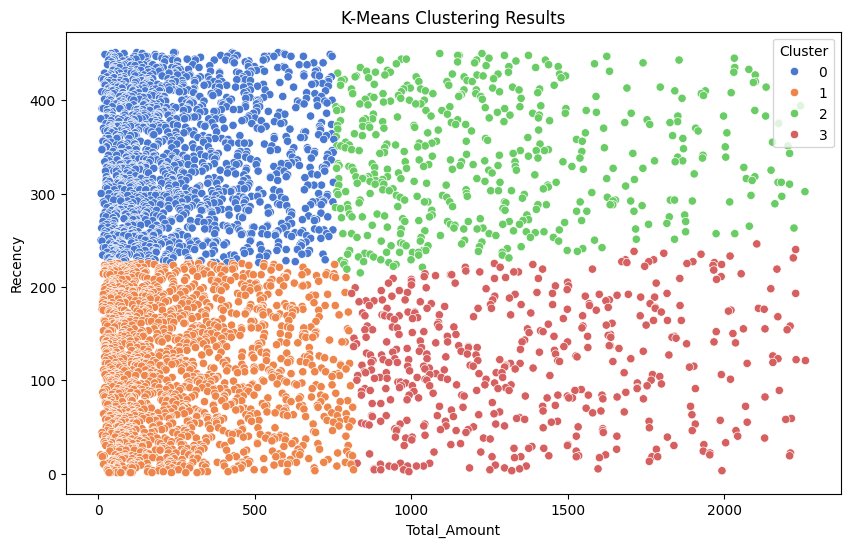

In [136]:
cluster_colors = sns.color_palette('muted', n_colors=4)

plt.figure(figsize=(10, 6))

sns.scatterplot(data=non_total_amount_outliers, x="Total_Amount", y="Recency", hue="Cluster", palette=cluster_colors)
plt.title('K-Means Clustering Results')
plt.show()

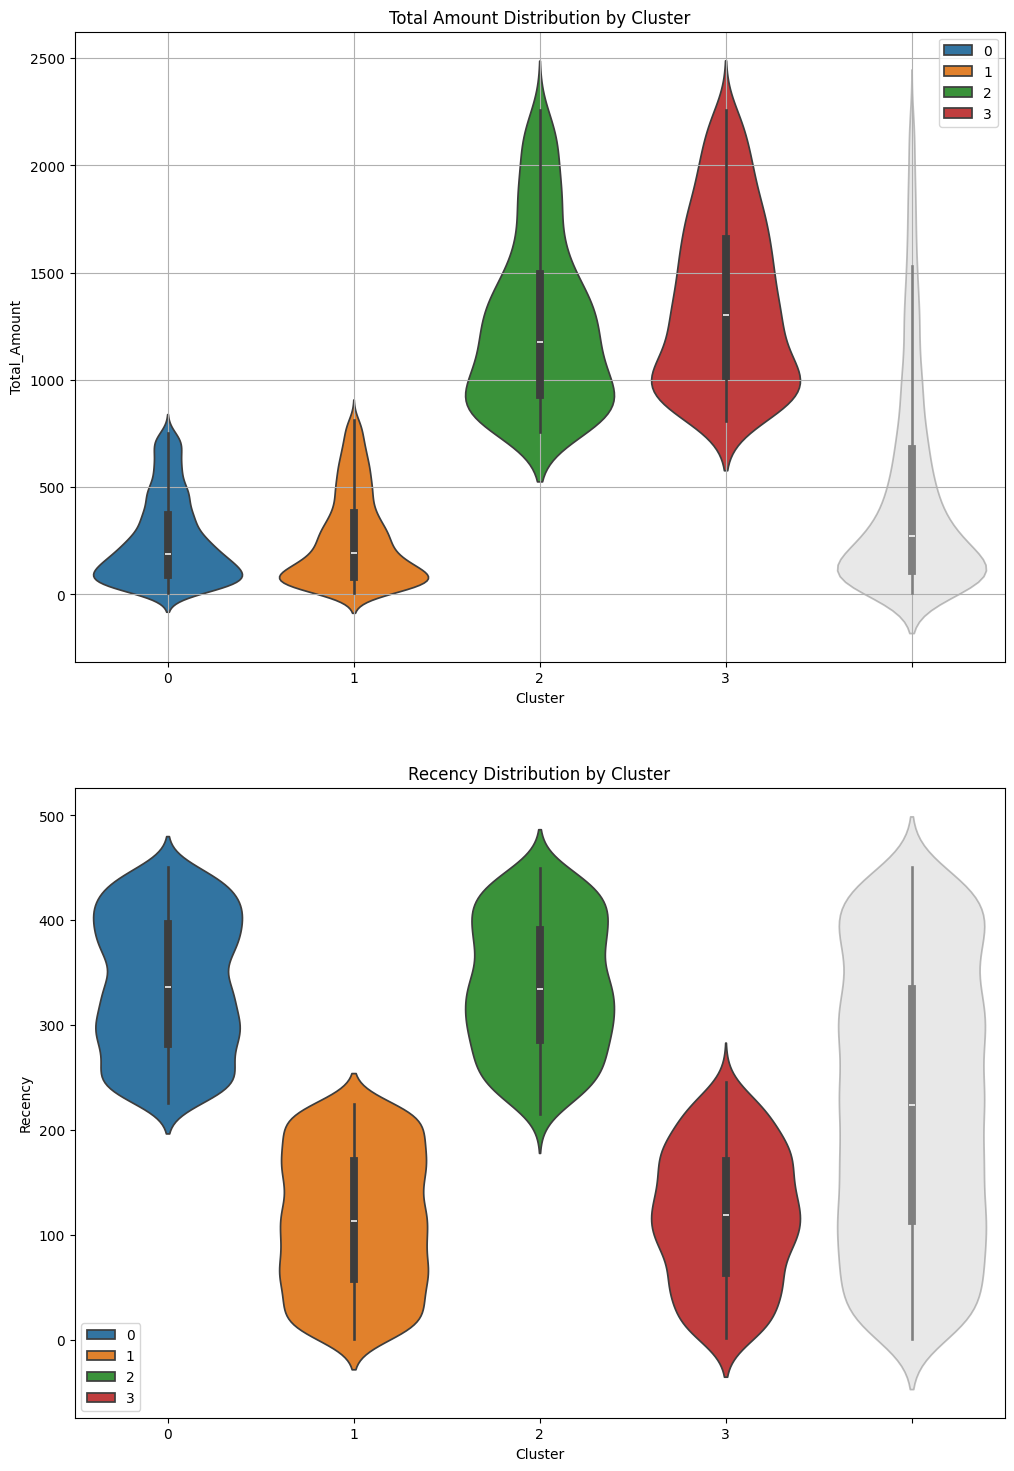

In [108]:
plt.figure(figsize=(12, 18))

plt.subplot(2, 1, 1)
sns.violinplot(data=non_total_amount_outliers, x='Cluster', y='Total_Amount', palette=cluster_colors, hue='Cluster')
sns.violinplot(y=non_total_amount_outliers['Total_Amount'], color='lightgrey', alpha=0.5)
plt.title('Total Amount Distribution by Cluster')
plt.grid(True)

plt.subplot(2, 1, 2)
sns.violinplot(data=non_total_amount_outliers, x='Cluster', y='Recency', palette=cluster_colors, hue='Cluster')
sns.violinplot(y=non_total_amount_outliers['Recency'], color='lightgrey', alpha=0.5)
plt.title('Recency Distribution by Cluster')

plt.show()

### Interpretation der Verteilungen

**1. Total Amount Distribution**

Die Auswertung der Total Amount Distribution zeigt, dass die Kunden in den Clustern 0 und 1 durch niedrige Ausgaben mit einer relativ engen Verteilung gekennzeichnet sind. Sie lassen sich klar als klassische „Low Value“-Kunden einordnen. Demgegenüber stehen die Cluster 2 und 3, deren Ausgaben deutlich höher und zugleich breiter gestreut sind. Diese Gruppen bilden die „High Value“-Kunden, die im Schnitt mehr als das Fünffache der Low-Value-Kunden ausgeben und damit einen erheblichen Anteil am Gesamtumsatz tragen.

**2. Recency Distribution**

Auch die Recency Distribution liefert spannende Einblicke: Kunden in den Clustern 0 und 2 weisen die höchsten Recency-Werte auf, was bedeutet, dass ihr letzter Kauf bereits lange zurückliegt. Diese Gruppen bergen ein erhöhtes Risiko der Abwanderung und sollten gezielt reaktiviert werden. Im Gegensatz dazu zeigen die Cluster 1 und 3 die niedrigsten Recency-Werte. Hier handelt es sich um sehr aktuelle Käufer, die gerade erst aktiv waren und somit als „frisch aktiv“ gelten können.

> 🚀 **Business Insight:**
Aus dieser Segmentierung ergeben sich klare Handlungsfelder. Die High-Value-Kunden mit niedriger Recency (Cluster 3) sind die wertvollsten und sollten durch exklusive Angebote, Loyalty-Programme und Premium-Services gebunden werden. Die Low-Value-Kunden mit hoher Recency (Cluster 0) hingegen sind akut abwanderungsgefährdet und benötigen gezielte Reaktivierungskampagnen, etwa durch personalisierte Rabatte oder Reminder. Die Low-Value-Kunden mit niedriger Recency (Cluster 1) stellen eine Gruppe dar, die sich durch Upselling und Cross-Selling entwickeln lässt. Schließlich sind die High-Value-Kunden mit hoher Recency (Cluster 2) besonders spannend: Sie haben bereits bewiesen, dass sie wertvoll sind, sind aber aktuell weniger aktiv. Hier können gezielte Incentives oder exklusive Re-Engagement-Kampagnen helfen, sie zurück ins Spiel zu holen.

# K-Means für Ausreißer Datenpunkte (Diamond Tier-Kunden)

<Axes: xlabel='Total_Amount', ylabel='Recency'>

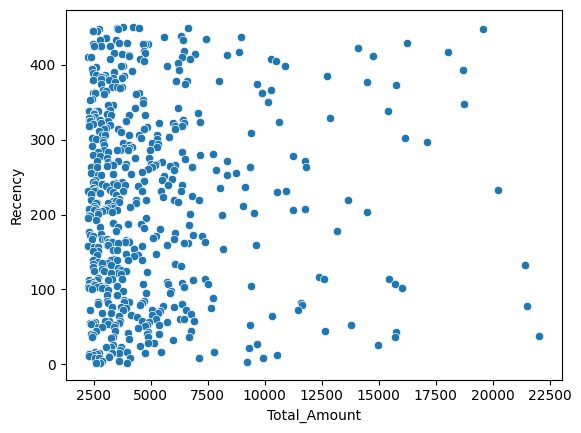

In [110]:
sns.scatterplot(data=total_amount_outliers, x="Total_Amount", y="Recency")

In [114]:
median_total_amount_outliers = total_amount_outliers['Recency'].median()
median_total_amount_outliers

np.float64(217.0)

In [119]:
total_amount_outliers['Cluster'] = np.where(total_amount_outliers['Recency'] < median_total_amount_outliers, 5, 4)
total_amount_outliers

/var/folders/tt/17l24mc97qn4rv53m2c8v5wm0000gn/T/ipykernel_88352/1919362001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_amount_outliers['Cluster'] = np.where(total_amount_outliers['Recency'] < median_total_amount_outliers, 5, 4)


,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating,Recency,Cluster
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4,451,4
6,ORD_002506,CUST_02506,2023-01-01,25,Female,Izmir,Electronics,2107.37,2,0.00,4214.74,Digital Wallet,Desktop,10,5,False,6,5,451,4
9,ORD_003413,CUST_03413,2023-01-02,58,Male,Istanbul,Sports,1784.75,4,490.25,6648.75,Debit Card,Desktop,8,5,True,5,4,450,4
13,ORD_000514,CUST_00514,2023-01-02,24,Male,Eskisehir,Home & Garden,897.02,5,0.00,4485.10,Digital Wallet,Desktop,17,7,True,8,4,450,4
19,ORD_004204,CUST_04204,2023-01-03,23,Male,Bursa,Electronics,1837.61,2,156.33,3518.89,Credit Card,Desktop,22,9,True,9,4,449,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4954,ORD_003502,CUST_03502,2024-03-22,27,Male,Adana,Electronics,954.78,3,0.00,2864.34,Credit Card,Mobile,11,8,True,9,4,5,5
4976,ORD_003481,CUST_03481,2024-03-24,31,Female,Izmir,Electronics,3078.07,3,0.00,9234.21,Bank Transfer,Tablet,11,12,True,4,5,3,5
4980,ORD_004882,CUST_04882,2024-03-25,51,Female,Adana,Home & Garden,744.29,4,214.72,2762.44,Debit Card,Tablet,10,11,False,7,3,2,5
4986,ORD_003210,CUST_03210,2024-03-25,40,Male,Ankara,Electronics,654.04,4,0.00,2616.16,Credit Card,Tablet,24,15,True,8,4,2,5


/var/folders/tt/17l24mc97qn4rv53m2c8v5wm0000gn/T/ipykernel_88352/622771653.py:1: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=total_amount_outliers, x="Total_Amount", y="Recency", hue="Cluster", palette=cluster_colors)


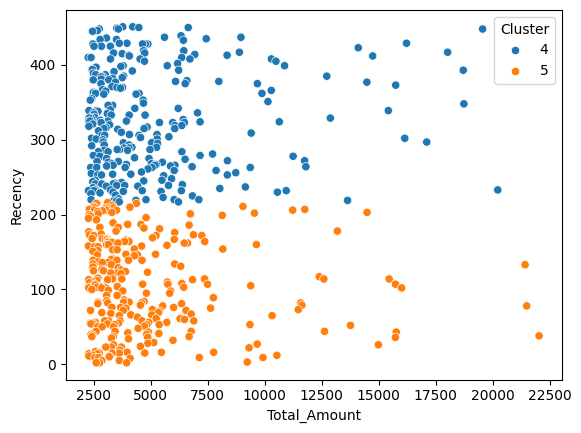

In [120]:
sns.scatterplot(data=total_amount_outliers, x="Total_Amount", y="Recency", hue="Cluster", palette=cluster_colors)
plt.show()

In [121]:
full_clustered_df = pd.concat([non_total_amount_outliers, total_amount_outliers], axis=0).sort_index()
full_clustered_df

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating,Recency,Cluster
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5,451,0
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3,451,0
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2,451,0
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4,451,0
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4,451,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ORD_001048,CUST_01048,2024-03-26,18,Female,Izmir,Beauty,130.35,1,27.30,103.05,Bank Transfer,Mobile,17,10,False,9,1,1,1
4996,ORD_001051,CUST_01051,2024-03-26,27,Male,Adana,Beauty,71.55,1,0.00,71.55,Debit Card,Mobile,13,9,True,6,4,1,1
4997,ORD_003543,CUST_03543,2024-03-26,45,Female,Antalya,Food,39.38,1,5.27,34.11,Digital Wallet,Mobile,38,10,True,5,4,1,1
4998,ORD_004443,CUST_04443,2024-03-26,41,Female,Istanbul,Fashion,171.19,1,0.00,171.19,Credit Card,Mobile,20,12,True,5,4,1,1


<Axes: xlabel='Cluster', ylabel='Density'>

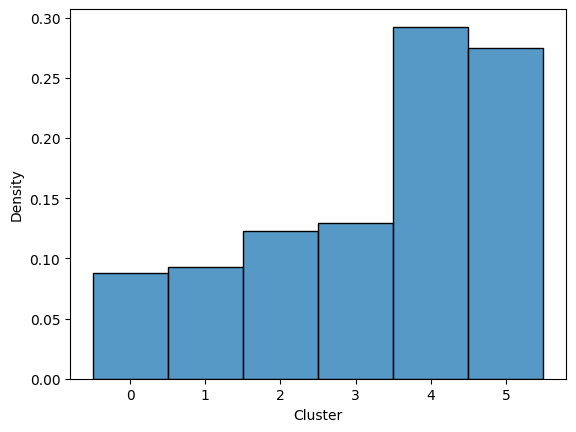

In [127]:
sns.histplot(data=full_clustered_df, x='Cluster', bins=5, weights=full_clustered_df["Total_Amount"], stat="density", discrete=True)